In [ ]:
from google.colab import drive
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
from torchvision import models, transforms, datasets, utils
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage
import torchvision.transforms as T
import imageio

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def scale(x):
    return (x - np.min(x))/np.max(x)
def scale1(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x,cmap='gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [ ]:
net = alexnet(pretrained=True)

In [ ]:
normalize = T.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = T.Compose([
   T.Resize(256),
   T.CenterCrop(224),
   T.ToTensor(),
   normalize
])

In [ ]:
def load_im(im):
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image)
    img_tensor = img_tensor.unsqueeze_(0)
    img_variable = torch.tensor(img_tensor)
    return img_variable

In [ ]:
def inference(im):
    out = net(load_im(im))
    label_index = out.cpu().data.numpy().argmax()
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])
    print(labels[label_index])
    # print('____')
    # for i in range(10):
    #     print(labels[top_list[i]])

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/TruckData/truck/train/truck' 

In [ ]:
os.chdir(data_dir)

In [ ]:
pwd

'/content/drive/MyDrive/TruckData/truck/train/truck'

In [ ]:
ls

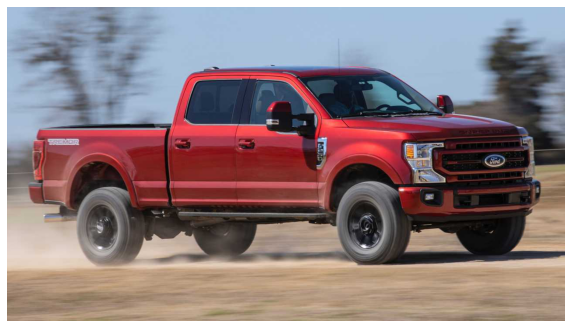

pickup, pickup truck


In [ ]:
im = imageio.imread('https://cdn.motor1.com/images/mgl/G3y6rA/s3/2022-ford-f-series-super-duty.jpg')
plot(im)
out = net(load_im(im))
inference(im)

In [ ]:
files = os.listdir()
for file in files:
    im = imageio.imread(file)[:,:,:3]
    plt.imshow(im)
    plt.title(inference(im))
    plt.show()
    out = net(load_im(im))

# Image Augmentation

In [ ]:
normalize = T.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = T.Compose([
#    T.RandAugment(),
   T.AugMix(),
   T.Resize(256),
   T.CenterCrop(224),
   T.ToTensor(),

   normalize
])

In [ ]:
im = imageio.imread('https://cdn.motor1.com/images/mgl/G3y6rA/s3/2022-ford-f-series-super-duty.jpg')
image = Image.fromarray(im) #convert to pil
img_tensor = torch.stack([preprocess(image.copy()) for _ in range(100)])

In [ ]:
out = net(img_tensor)

In [ ]:
smr = F.softmax(out).detach().numpy()

In [ ]:
smr = smr.T

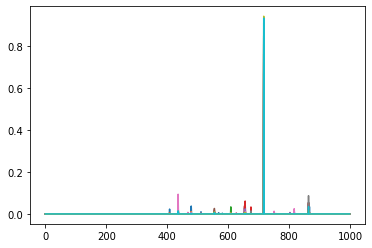

In [ ]:
plt.plot(smr[:,0:10]);

In [ ]:
smr.shape

(1000, 100)

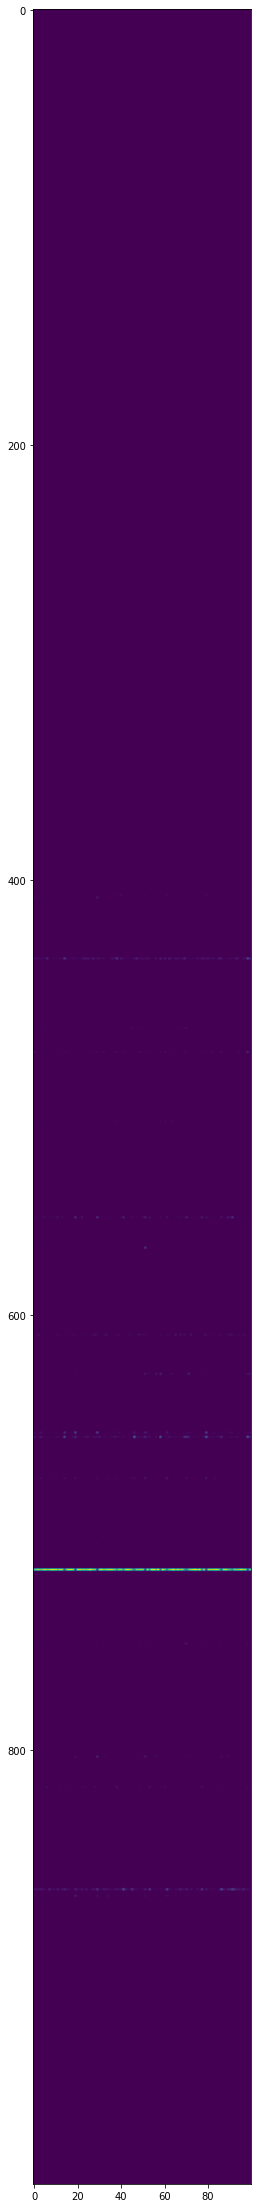

In [ ]:
plt.imshow((smr))

plt.gcf().set_size_inches(4,40)

In [ ]:
np.argmax(smr,0)

array([717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717,
       717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717,
       717, 717, 717, 654, 717, 717, 717, 717, 717, 717, 717, 717, 717,
       717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717,
       717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717,
       717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717,
       717, 656, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717, 717,
       717, 717, 717, 717, 717, 717, 717, 717, 717])

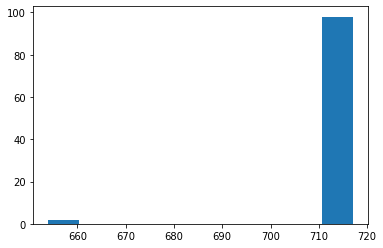

In [ ]:
plt.hist(np.argmax(smr,0));

In [ ]:
from statistics import mode

In [ ]:
mode(np.argmax(smr,0))

717

In [ ]:
labels[mode(np.argmax(smr,0))]

'pickup, pickup truck'

In [ ]:
img_tensor[0].shape

torch.Size([3, 224, 224])

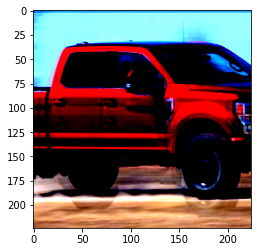

In [ ]:
plt.imshow(img_tensor[1].transpose(0,2).transpose(0,1))

In [ ]:
smr.shape

(1000, 100)

In [ ]:
labels[np.argmax(smr[:,0],0)]

'pickup, pickup truck'

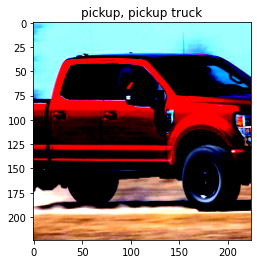

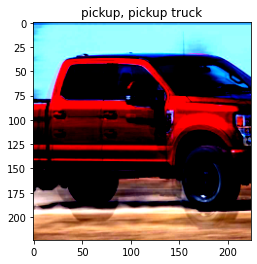

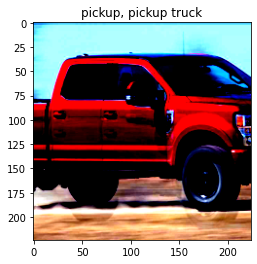

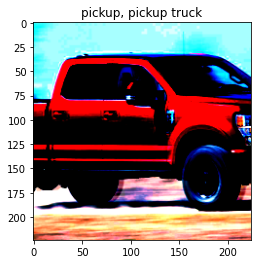

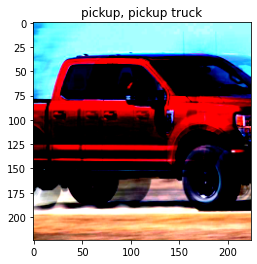

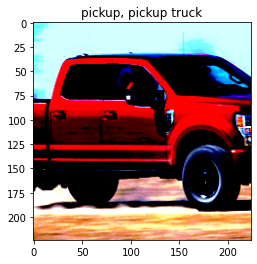

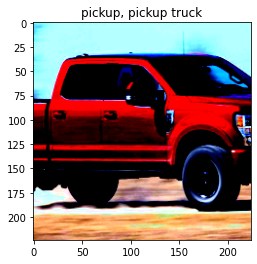

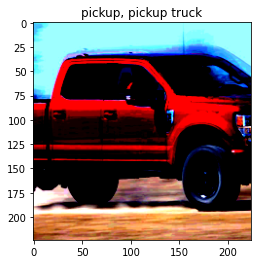

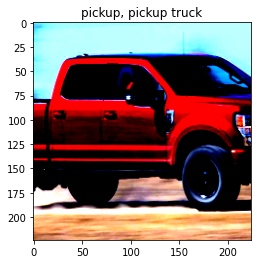

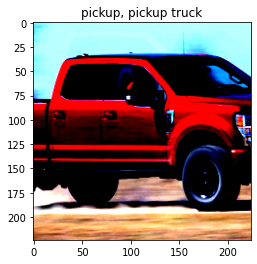

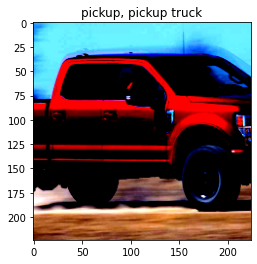

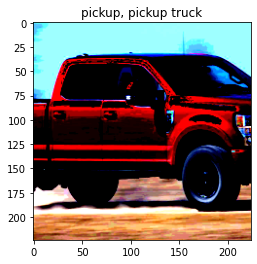

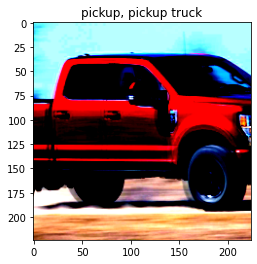

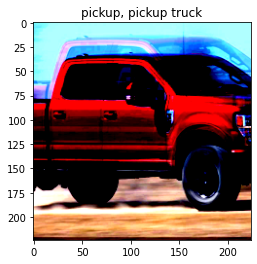

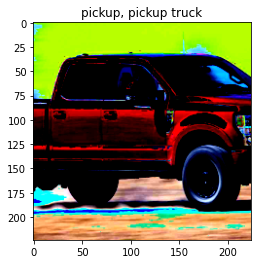

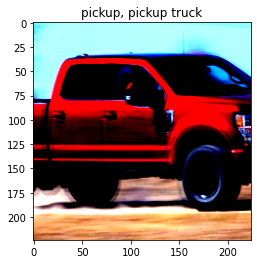

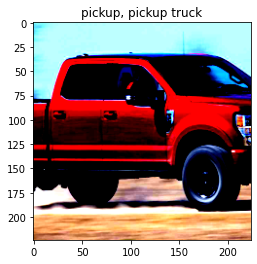

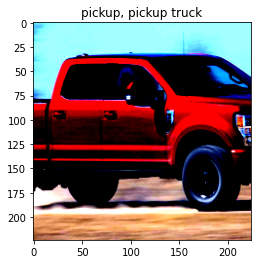

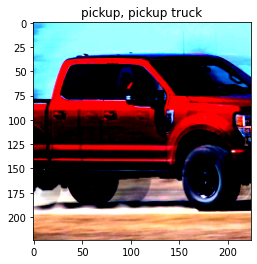

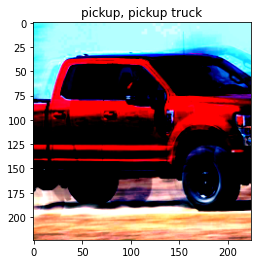

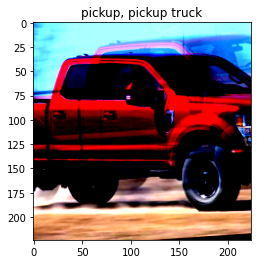

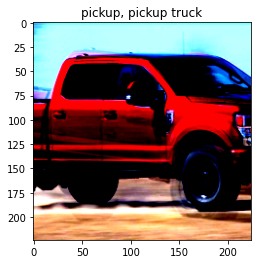

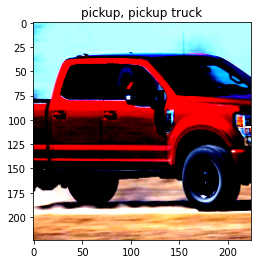

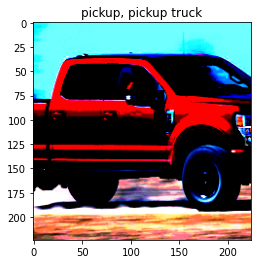

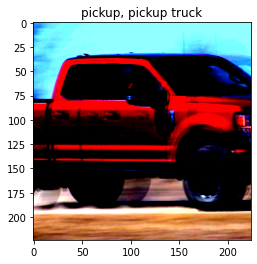

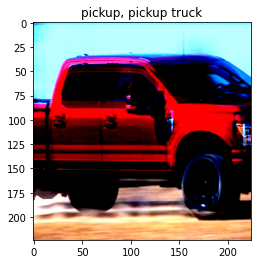

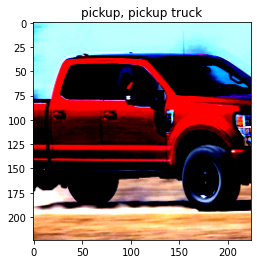

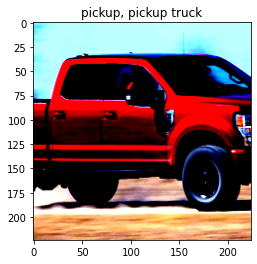

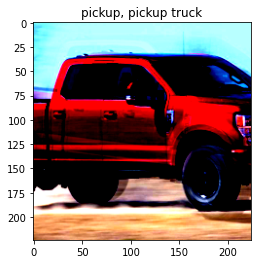

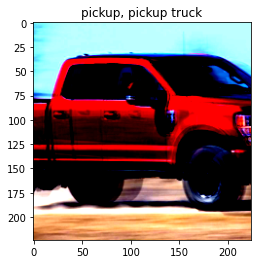

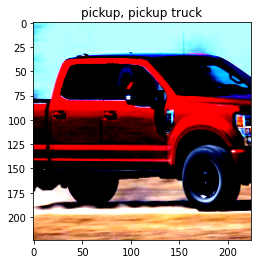

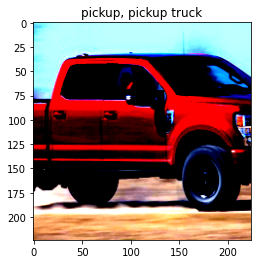

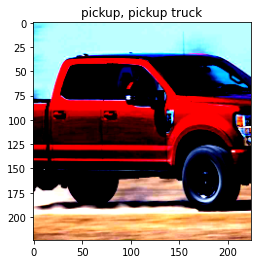

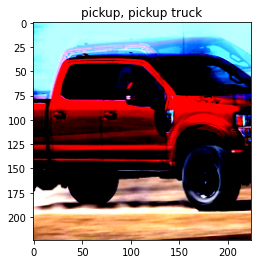

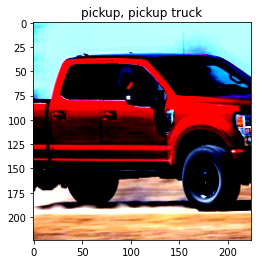

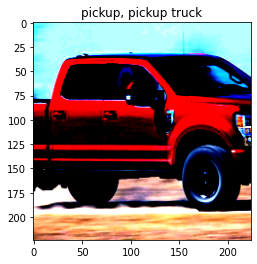

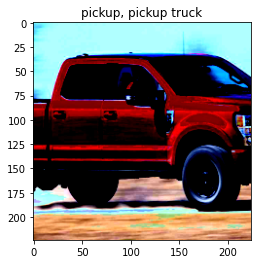

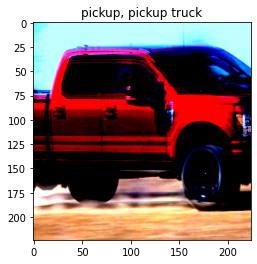

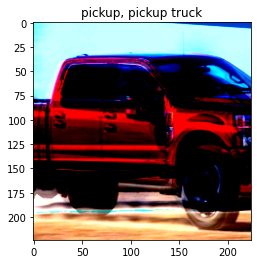

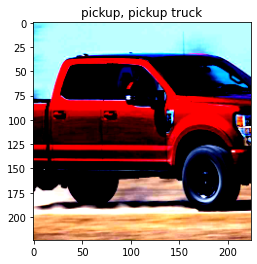

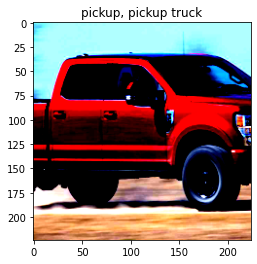

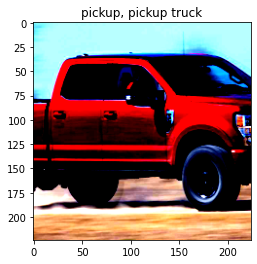

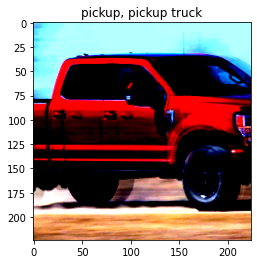

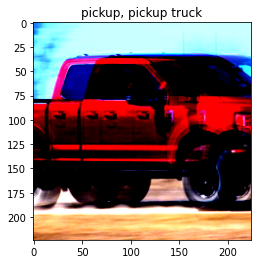

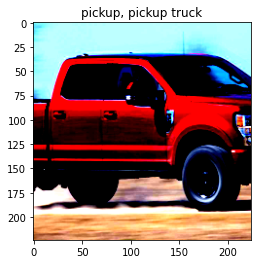

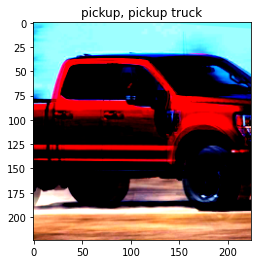

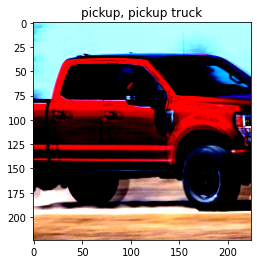

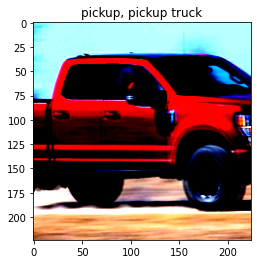

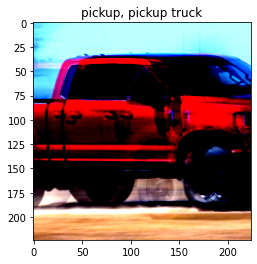

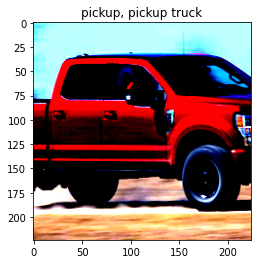

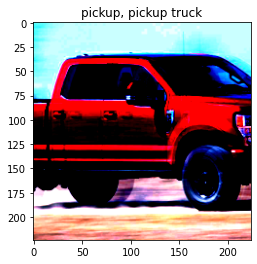

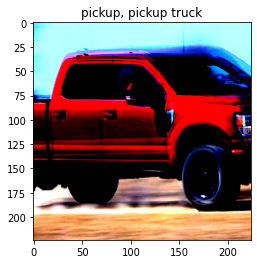

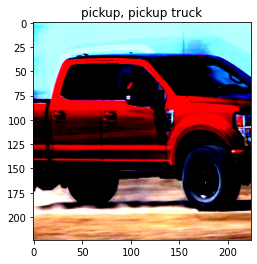

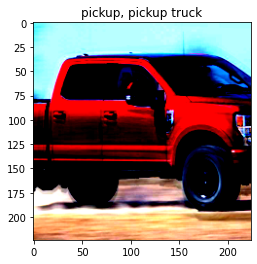

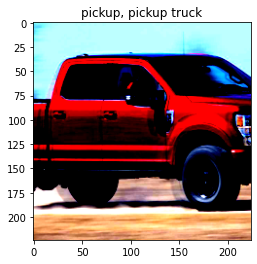

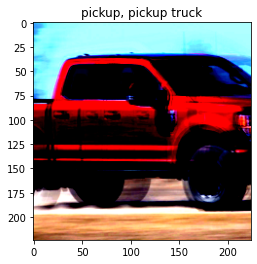

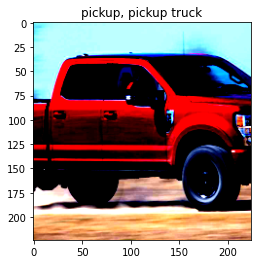

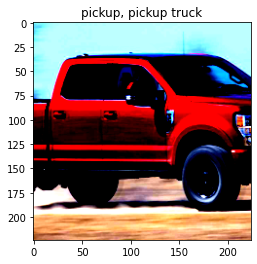

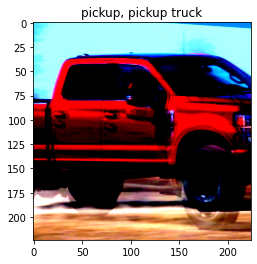

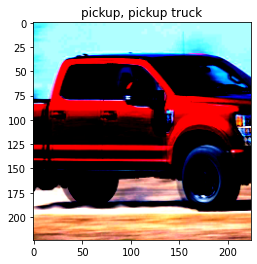

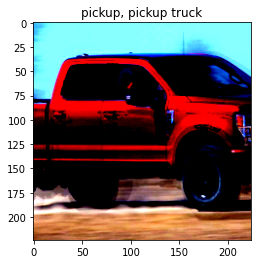

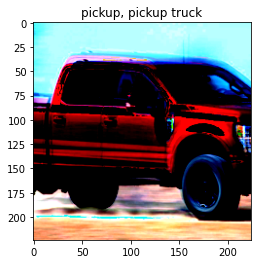

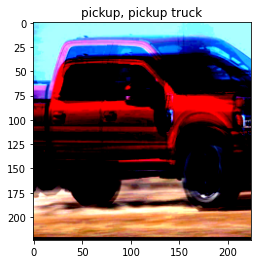

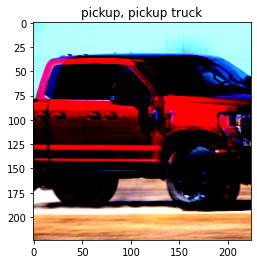

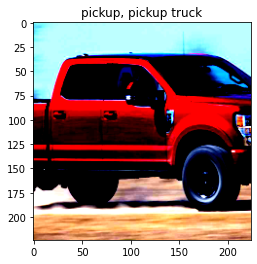

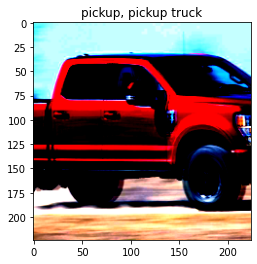

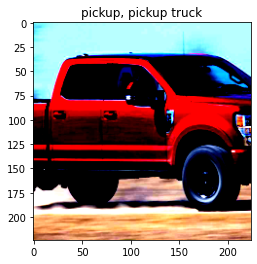

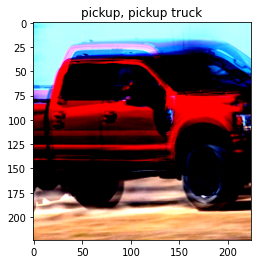

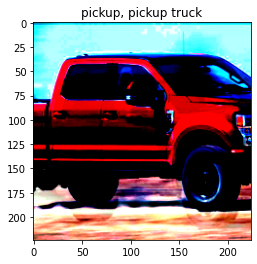

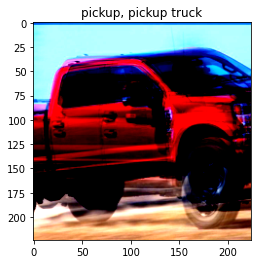

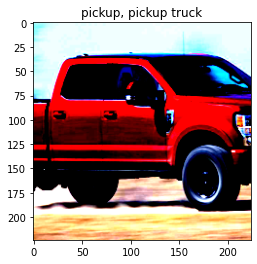

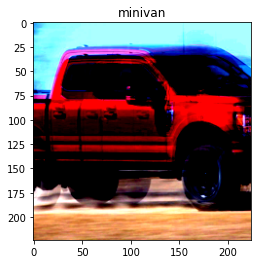

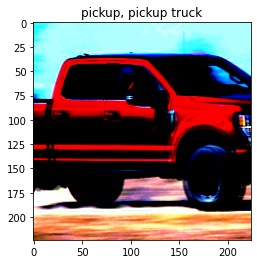

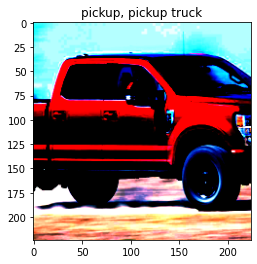

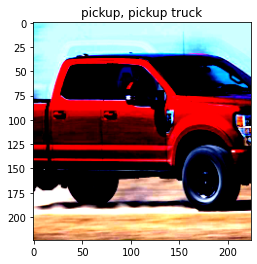

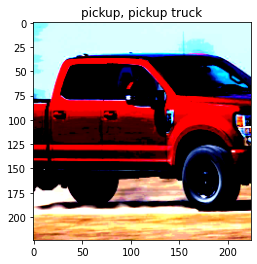

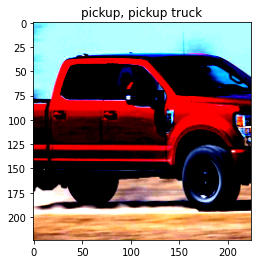

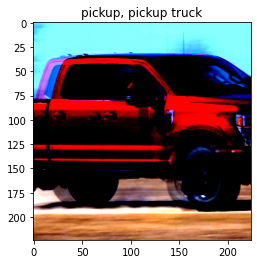

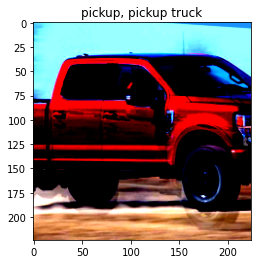

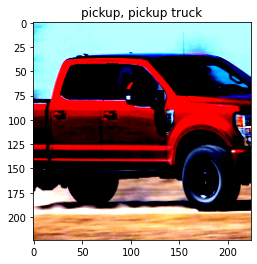

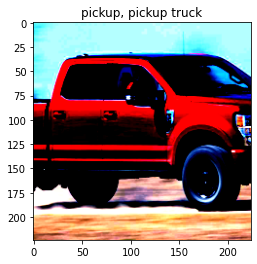

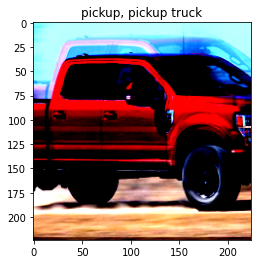

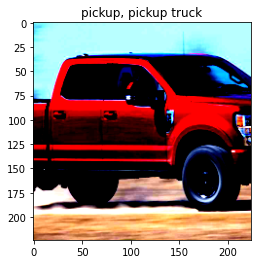

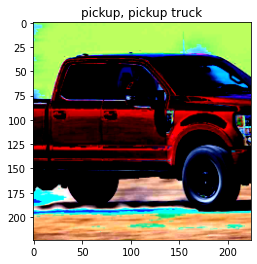

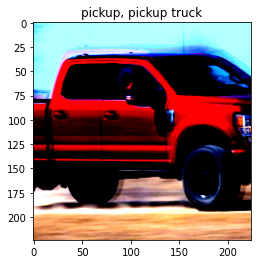

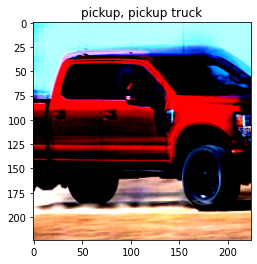

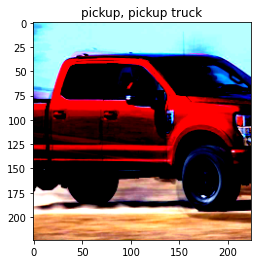

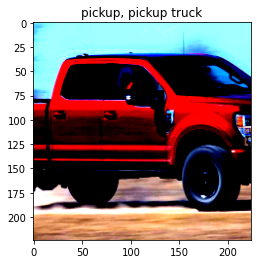

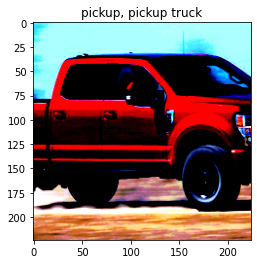

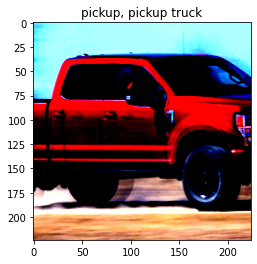

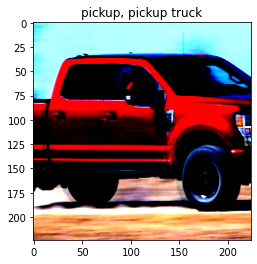

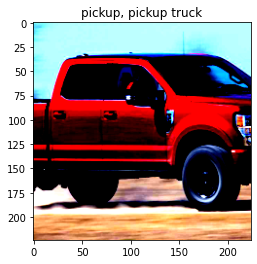

In [ ]:
for i in range(100):
    plt.imshow(img_tensor[i].transpose(0,2).transpose(0,1));
    plt.title(labels[np.argmax(smr[:,i],0)])
    plt.show();

In [ ]:
ls

train/  valid/


In [ ]:
dataset_labels =["truck"] #<--- Replace with your labels 

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  #Data Augmentation 
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

In [ ]:
data_dir

'/content/drive/MyDrive/TruckData/truck'

In [ ]:
# dataloader
batch_size = 75
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
dataset_sizes

{'train': 76, 'valid': 24}

In [ ]:
def imshow(inp, title = " "):
    fig, ax = plt.subplots()
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    ax.imshow(inp)
    plt.title(title, loc='center')
    # fig.set_size_inches(5, 5)
    plt.show()

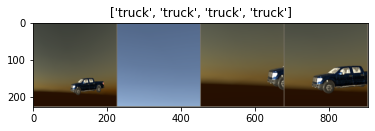

In [ ]:
inputs, classes = next(iter(dataloaders['train']))
inputs = inputs[:4]
classes = classes[:4] 
out = utils.make_grid(inputs)
imshow(out, title=[dataset_labels[x] for x in classes])

In [ ]:
truck_classno = 717

In [ ]:
device

device(type='cpu')

In [ ]:
input = next(iter(dataloaders['train']))[0][1:2]

In [ ]:
input.shape

torch.Size([1, 3, 224, 224])

In [ ]:
model = models.alexnet(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
out = model(input)

In [ ]:
out.shape

torch.Size([1, 1000])

In [ ]:
smr = F.softmax(out[0]).detach().numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [ ]:
labs = smr.argsort()[::-1]
probs = smr[labs]

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [ ]:
labels_np = np.array(list(labels.values()))

In [ ]:
labs = labels_np[labs]

<BarContainer object of 10 artists>

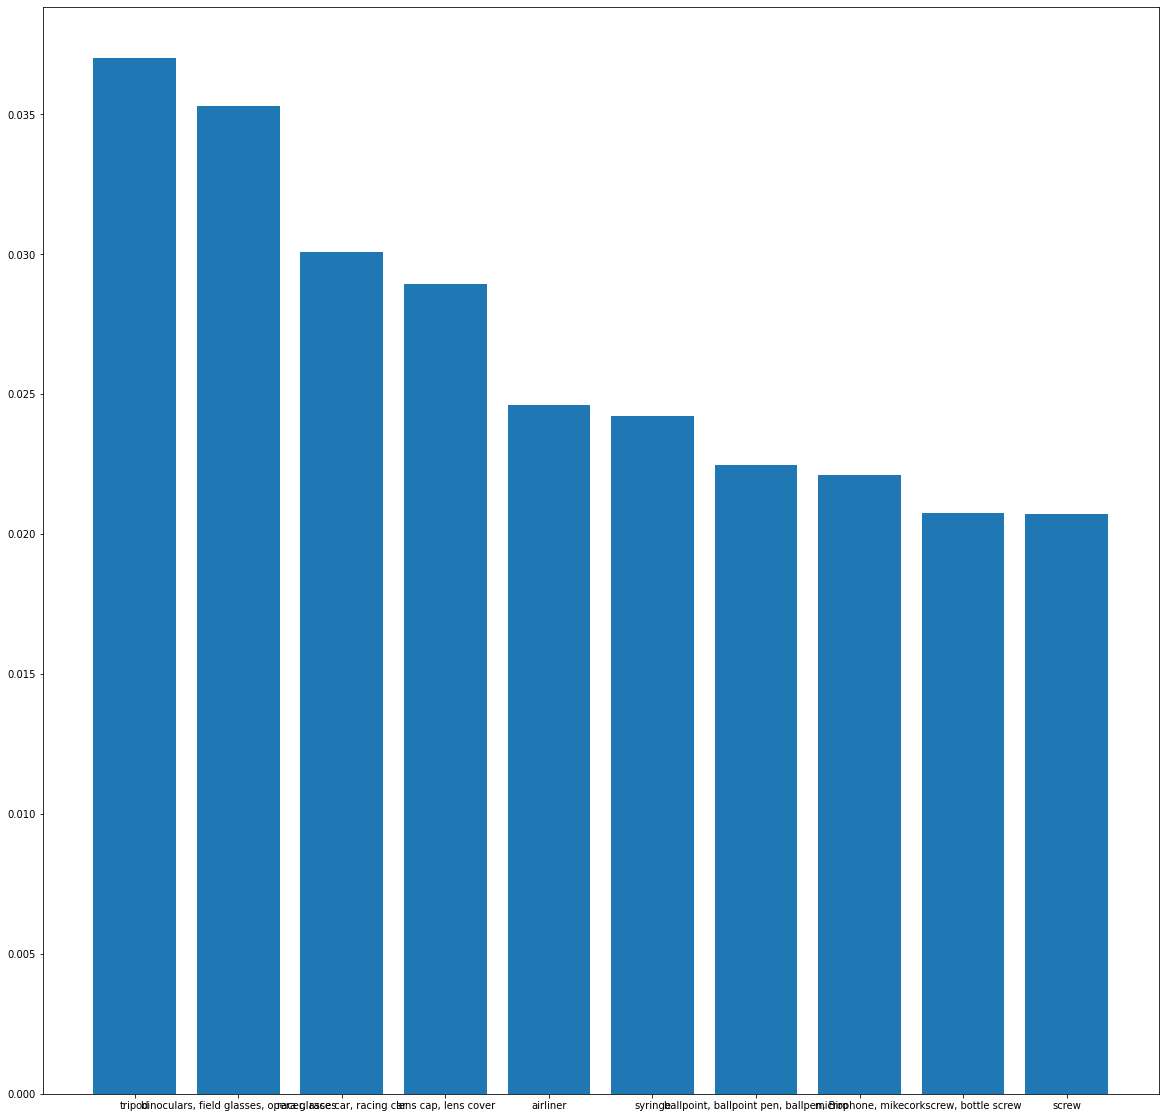

In [ ]:
plt.figure(figsize=(20,20))
plt.bar(np.arange(10),probs[:10],tick_label=labs[:10])
#plt.yscale('log')

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(15, 15)
    plt.show()

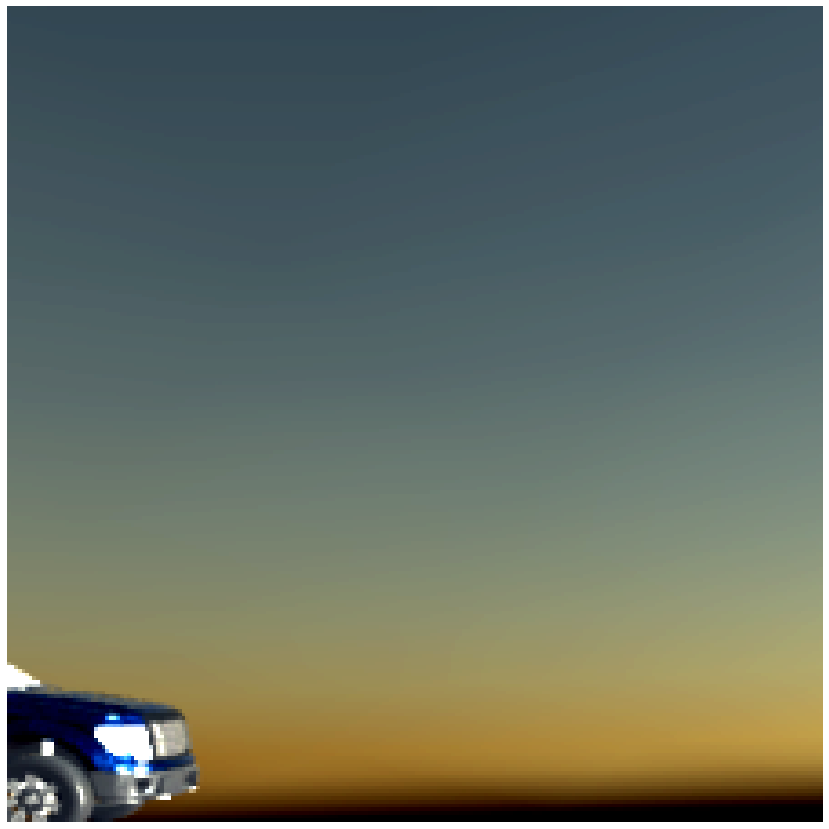

In [ ]:
plot((input[0].permute(1,2,0)-input[0].min()/(input[0].max()-input[0].min()) + 1)/2)

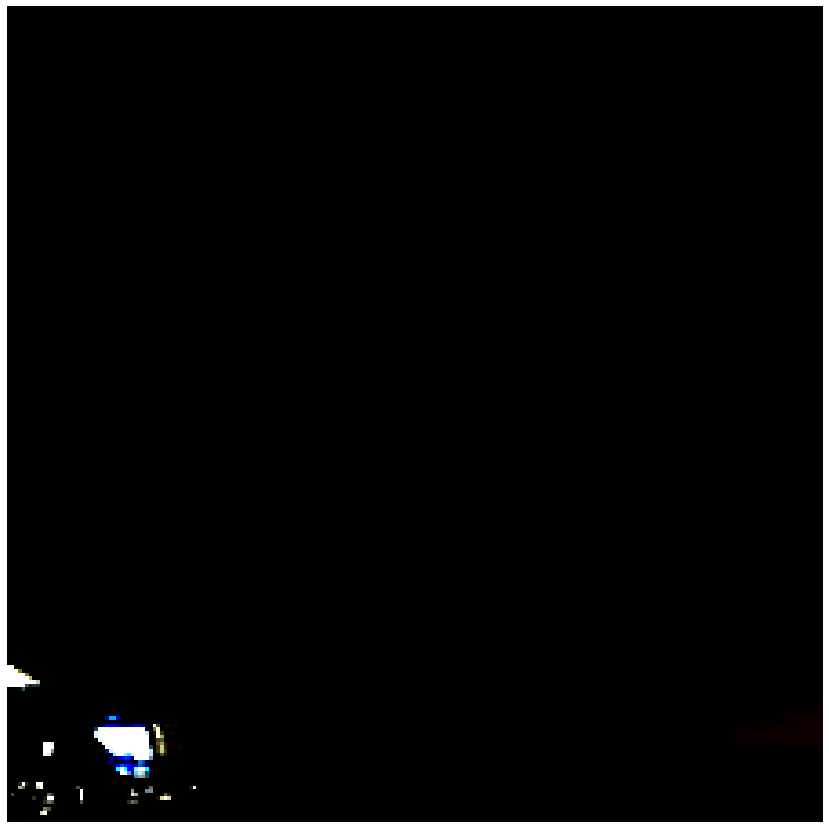

In [ ]:
plot((input[0].permute(1,2,0)))

# Batch Input

In [ ]:
input = next(iter(dataloaders['train']))[0]

In [ ]:
input.shape

torch.Size([75, 3, 224, 224])

In [ ]:
out = model(input)

In [ ]:
smr = F.softmax(out).detach().numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [ ]:
smr.shape

(75, 1000)

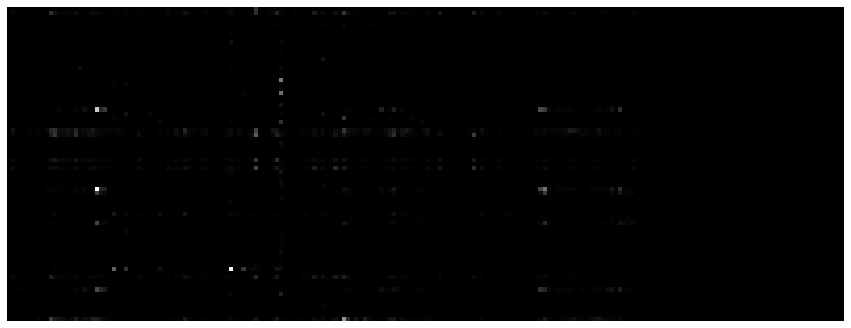

In [ ]:
plot((smr[:,:200]))

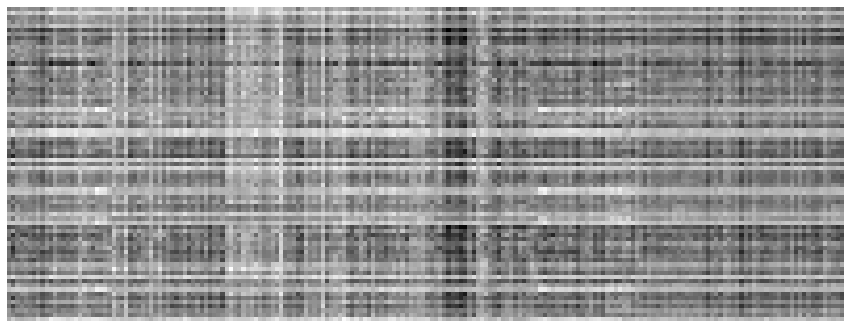

In [ ]:
plot(np.log(smr[:,:200]))

# Extras

In [ ]:
!pip install flashtorch
from flashtorch.utils import apply_transforms
from skimage.io import imread
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T

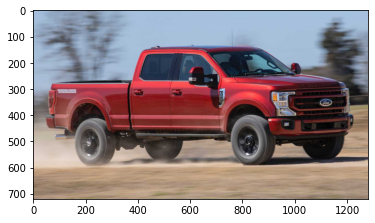

In [ ]:
image = imread('https://cdn.motor1.com/images/mgl/G3y6rA/s3/2022-ford-f-series-super-duty.jpg')
plt.imshow(image);

In [ ]:
img = apply_transforms(image).clone().detach().requires_grad_(True)#.to(device)

In [ ]:
outputs = model(img)
preds = torch.max(outputs, 1)[1]

In [ ]:
print('predicted: ', [preds])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from torchvision.io import read_image

import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
plt.rcParams["savefig.bbox"] = 'tight'
torch.manual_seed(1)
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [ ]:
import urllib.request

In [ ]:
urls = ['https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Red_Apple.jpg/199px-Red_Apple.jpg']

In [ ]:
urllib.request.urlretrieve(urls[0],"image1.jpg")

In [ ]:
image = read_image('image1.jpg')
show([image])

In [ ]:
transforms = torch.nn.Sequential(
    # T.RandomCrop(224),
    T.RandomHorizontalFlip(p=0.3),
)

In [ ]:
transformed_image1 = transforms(image)
transformed_image2 = transforms(image)

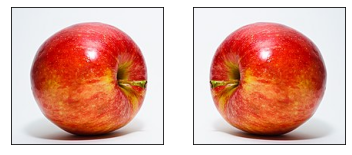

In [ ]:
show([transformed_image1,transformed_image2])

In [ ]:
transforms = T.RandAugment()
transformed_images = [transforms(image) for _ in range(100)]

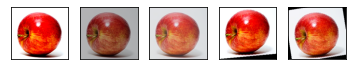

In [ ]:
show(transformed_images[:5])